# https://data.world/gautam2510/credit-card-dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import cufflinks as cf
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
cf.go_offline()

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
df = pd.read_csv('CreditCardDataset_cleaned.csv')
df

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,Cash Back,Letter,High,1,No,1,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17972,0,Cash Back,Letter,High,1,No,1,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17973,0,Cash Back,Letter,High,1,No,1,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17974,0,Cash Back,Letter,Medium,1,No,2,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer_Accepted        17976 non-null  int64  
 1   Reward                17976 non-null  object 
 2   Mailer_Type           17976 non-null  object 
 3   Income_Level          17976 non-null  object 
 4   Bank_Accnt_Open       17976 non-null  int64  
 5   Overdraft_Protection  17976 non-null  object 
 6   Credit_Rating         17976 non-null  int64  
 7   Credit_Cards_Held     17976 non-null  int64  
 8   Homes_Owned           17976 non-null  int64  
 9   Household_Size        17976 non-null  int64  
 10  Own_Your_Home         17976 non-null  object 
 11  Average_Balance       17976 non-null  float64
 12  Q1_Balance            17976 non-null  float64
 13  Q2_Balance            17976 non-null  float64
 14  Q3_Balance            17976 non-null  float64
 15  Q4_Balance         

In [7]:
df.describe()

,Offer_Accepted,Bank_Accnt_Open,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,0.056798,1.255730,2.006453,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.231463,0.472405,0.817447,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,0.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,0.000000,1.000000,3.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,1.000000,3.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [8]:
df['Reward'].iplot(kind='hist',title='Jumlah nasabah yang memiliki Reward tertentu')
#using cufflinks

In [9]:
# sns.pairplot(df)
df.corr()

,Offer_Accepted,Bank_Accnt_Open,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
Offer_Accepted,1.000000,-0.001577,-0.153068,-0.001929,-0.000463,-0.012852,-0.003878,-0.016535,-0.000310,0.008378,0.000580
Bank_Accnt_Open,-0.001577,1.000000,-0.013494,-0.001633,0.004762,0.008622,-0.003909,-0.002814,-0.007956,0.000190,-0.000356
Credit_Rating,-0.153068,-0.013494,1.000000,-0.004508,0.001017,-0.006955,0.004768,0.016890,-0.004485,-0.007961,0.004769
Credit_Cards_Held,-0.001929,-0.001633,-0.004508,1.000000,-0.002390,-0.003040,-0.003469,-0.009446,-0.007373,-0.007623,0.015362
Homes_Owned,-0.000463,0.004762,0.001017,-0.002390,1.000000,0.005227,0.017967,0.013143,0.009758,0.007775,0.014775
Household_Size,-0.012852,0.008622,-0.006955,-0.003040,0.005227,1.000000,-0.003582,-0.005080,-0.008766,0.003633,0.000232
Average_Balance,-0.003878,-0.003909,0.004768,-0.003469,0.017967,-0.003582,1.000000,0.481507,0.800285,0.752741,0.572380
Q1_Balance,-0.016535,-0.002814,0.016890,-0.009446,0.013143,-0.005080,0.481507,1.000000,0.483134,-0.060961,-0.237283
Q2_Balance,-0.000310,-0.007956,-0.004485,-0.007373,0.009758,-0.008766,0.800285,0.483134,1.000000,0.487710,0.168955
Q3_Balance,0.008378,0.000190,-0.007961,-0.007623,0.007775,0.003633,0.752741,-0.060961,0.487710,1.000000,0.565298


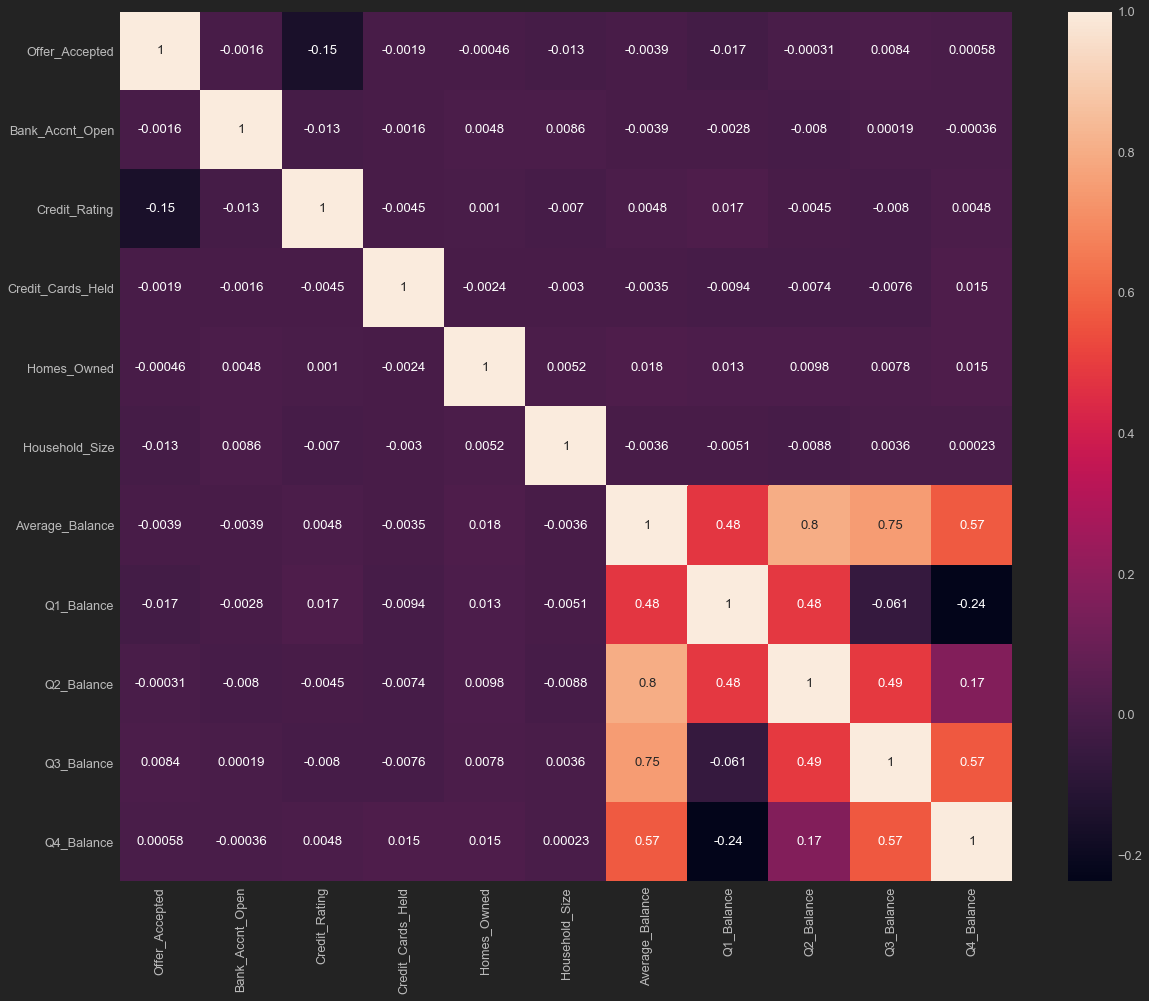

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(data=df.corr(),annot=True)

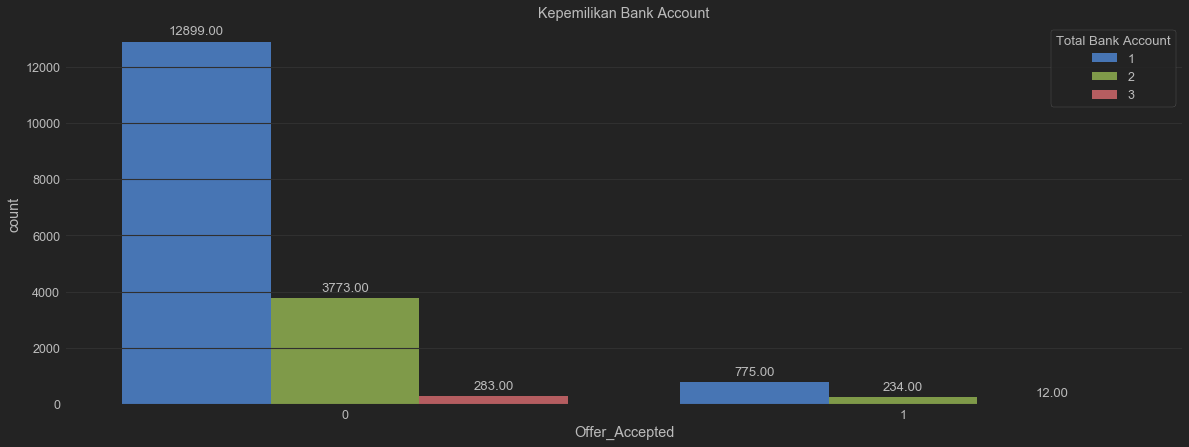

In [11]:
#people who accept offers with numbers of bank account
plt.figure(figsize=(20,7))
ax = sns.countplot(data=df, x='Offer_Accepted',hue='Bank_Accnt_Open')
for i in ax.patches: #making annotation
    ax.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
    

sns.despine(left=True, bottom=True, right=True) #only remove the frame
#ax.axis('off') #remove frame and all details
plt.title('Kepemilikan Bank Account')
plt.legend(title='Total Bank Account')


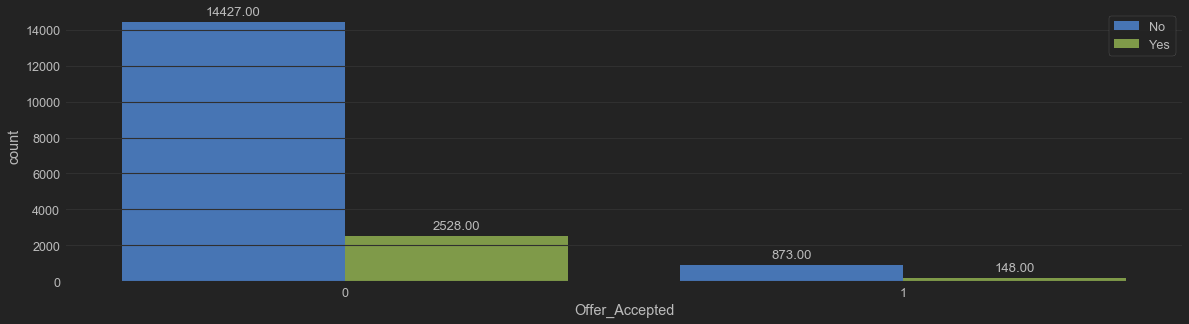

In [12]:
plt.figure(figsize=(20,5))
ay = sns.countplot(data=df, x='Offer_Accepted',hue='Overdraft_Protection')
for i in ay.patches: #making annotation
    ay.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

    sns.despine(left=True, bottom=True, right=True)
plt.legend()

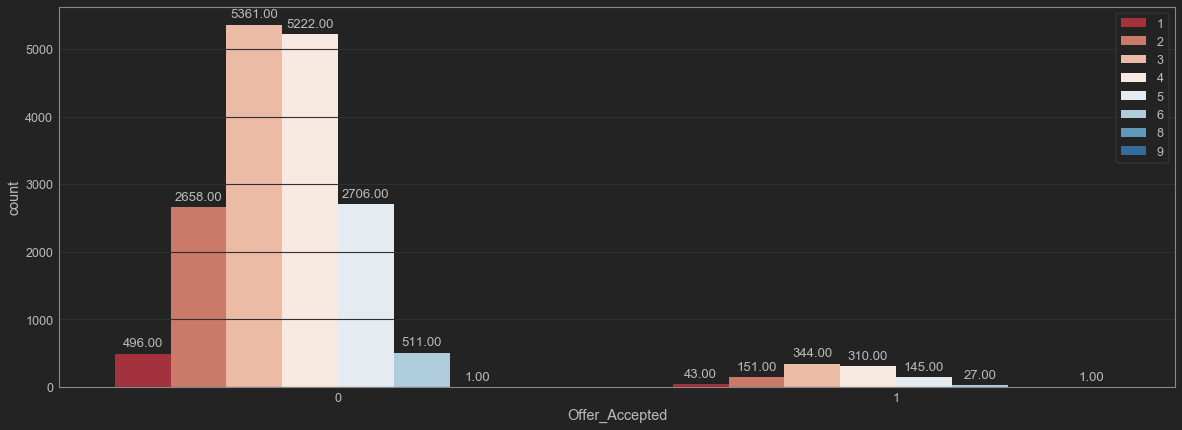

In [13]:
plt.figure(figsize=(20,7))
az=sns.countplot(data=df, x='Offer_Accepted',hue='Household_Size',palette='RdBu')
for i in az.patches: #making annotation
    az.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

plt.legend()


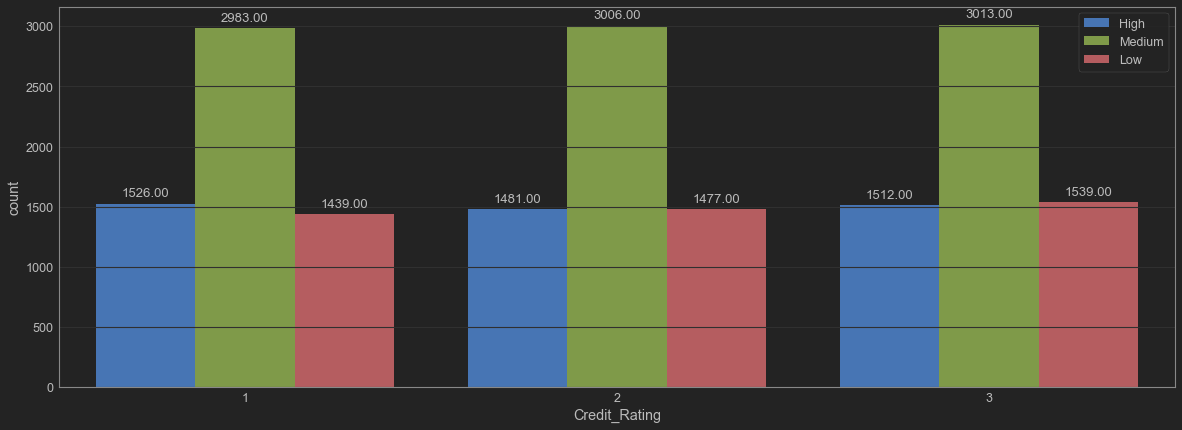

In [14]:
plt.figure(figsize=(20,7))
gg=sns.countplot(data=df, x='Credit_Rating',hue='Income_Level')
for i in gg.patches: #making annotation
    gg.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')
plt.legend()

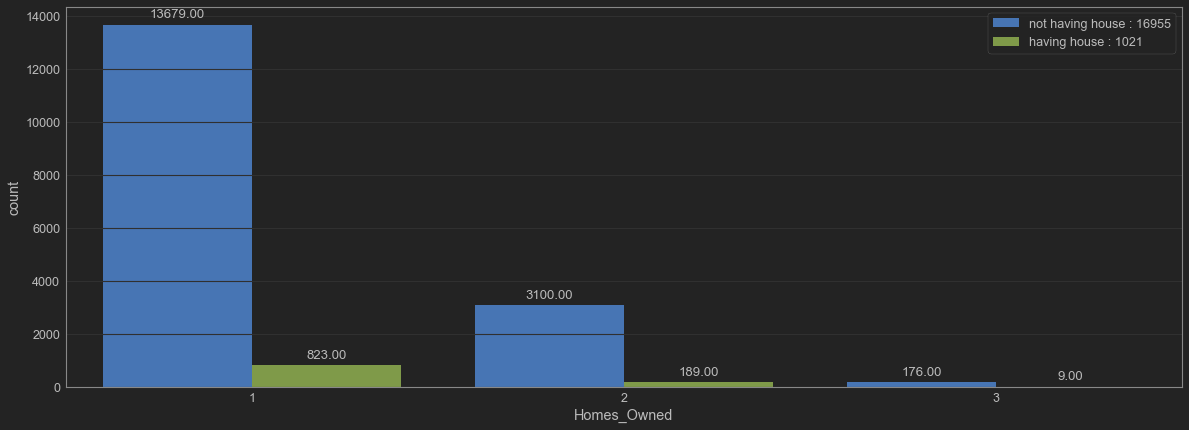

In [15]:
plt.figure(figsize=(20,7))
x = df['Offer_Accepted'].value_counts()
n=sns.countplot(data=df,x='Homes_Owned',hue='Offer_Accepted')
for i in n.patches: #making annotation
    n.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2.,i.get_height()),
               ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

e=plt.legend()
e.get_texts()[0].set_text(f'not having house : {x[0]}')
e.get_texts()[1].set_text(f'having house : {x[1]}')

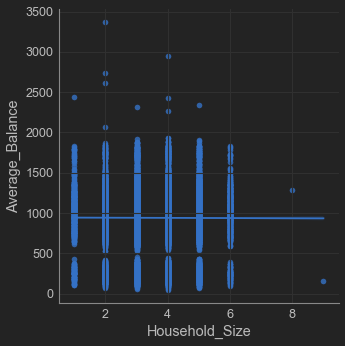

In [16]:
sns.lmplot(data=df, x='Household_Size',y='Average_Balance')

In [17]:
df.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


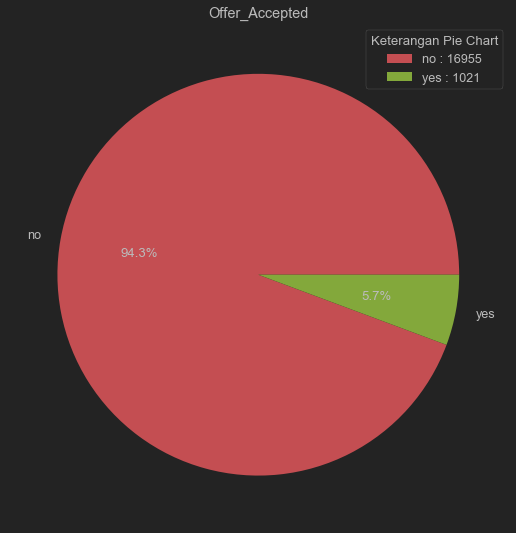

In [18]:
x = df['Offer_Accepted'].value_counts()
y = ['no','yes']
plt.figure(figsize=(9,13))
plt.pie(x,autopct='%1.1f%%',labels=y,colors='rg')
plt.title('Offer_Accepted')
n=plt.legend(title='Keterangan Pie Chart')
n.get_texts()[0].set_text(f'no : {x[0]}')
n.get_texts()[1].set_text(f'yes : {x[1]}')

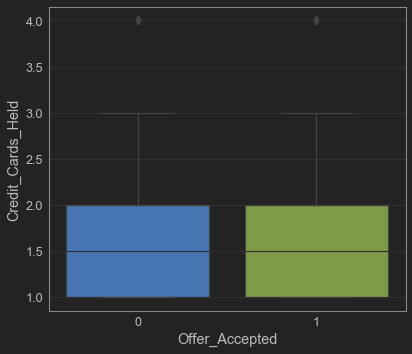

In [19]:
sns.boxplot(data=df,x='Offer_Accepted',y='Credit_Cards_Held')

In [20]:
df['Credit_Cards_Held'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: Credit_Cards_Held, dtype: int64

# Making the dummy data

In [21]:
df.head(2)

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [22]:
reward = pd.get_dummies(df['Reward'],prefix='Reward')
mailer = pd.get_dummies(df['Mailer_Type'],prefix='mailer')
income = pd.get_dummies(df['Income_Level'],prefix='income')
overdraw = pd.get_dummies(df['Overdraft_Protection'],prefix='overdraw')
creditcard = pd.get_dummies(df['Credit_Cards_Held'],prefix='CC')
homes = pd.get_dummies(df['Homes_Owned'],prefix='hold_home')
ownhome = pd.get_dummies(df['Own_Your_Home'],prefix='owningHome')


In [23]:
dtrain = df.copy()

In [24]:
dtrain = dtrain[['Offer_Accepted','Bank_Accnt_Open','Household_Size','Credit_Rating','Average_Balance','Q1_Balance','Q2_Balance','Q3_Balance','Q4_Balance']]
dtrain

,Offer_Accepted,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,1,4,3,1160.75,1669.0,877.0,1095.0,1002.0
1,0,1,5,2,147.25,39.0,106.0,78.0,366.0
2,0,2,2,2,276.50,367.0,352.0,145.0,242.0
3,0,2,4,3,1219.00,1578.0,1760.0,1119.0,419.0
4,0,1,6,2,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...
17971,0,1,5,1,167.50,136.0,65.0,71.0,398.0
17972,0,1,3,1,850.50,984.0,940.0,943.0,535.0
17973,0,1,4,1,1087.25,918.0,767.0,1170.0,1494.0
17974,0,1,2,2,1022.25,626.0,983.0,865.0,1615.0


In [25]:
dtrain = pd.concat([dtrain,reward,mailer,income,overdraw,creditcard,homes,ownhome],axis=1)
dtrain

,Offer_Accepted,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes
0,0,1,4,3,1160.75,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,5,2,147.25,39.0,106.0,78.0,366.0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1
2,0,2,2,2,276.50,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,2,4,3,1219.00,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
4,0,1,6,2,1211.00,2140.0,1357.0,982.0,365.0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,1,5,1,167.50,136.0,65.0,71.0,398.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
17972,0,1,3,1,850.50,984.0,940.0,943.0,535.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
17973,0,1,4,1,1087.25,918.0,767.0,1170.0,1494.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
17974,0,1,2,2,1022.25,626.0,983.0,865.0,1615.0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1


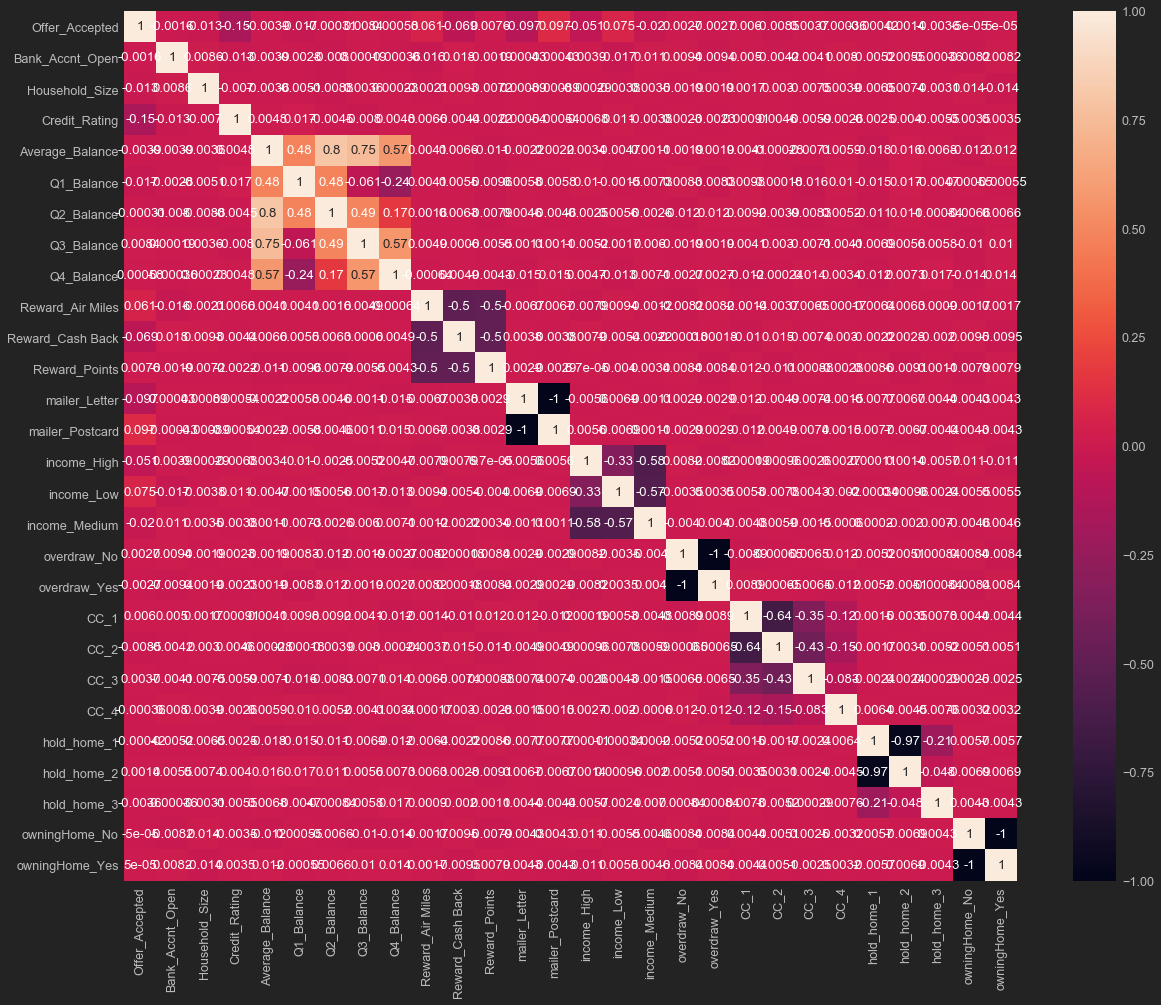

In [26]:
plt.figure(figsize=(20,16))
sns.heatmap(dtrain.corr(),annot=True)

# Split data train and test

In [27]:
X = dtrain.drop('Offer_Accepted',axis=1)
y = dtrain['Offer_Accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
11964,2,4,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
5390,2,6,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
860,1,4,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [29]:
y_train.value_counts()

0    11876
1      707
Name: Offer_Accepted, dtype: int64

# Train the model

## Logistic Regression

In [185]:
log = LogisticRegression(class_weight='balanced',multi_class='multinomial')
log.fit(X_train,y_train)

C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [186]:
prediction = log.predict(X_test)
predx1 = log.predict_proba(X_test)

In [187]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.75      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.71      0.50      5393
weighted avg       0.93      0.67      0.76      5393

[[3376 1703]
 [  78  236]]


In [32]:
predprob_ov1 = []
for i in predx1[:,0]:
    if i > 0.9914:
        predprob_ov1.append(0)
    else:
        predprob_ov1.append(1)
        
out1 = pd.DataFrame(confusion_matrix(y_test,predprob_ov1),columns=['pred_declined','pred_accepted'],
                  index=['act_declined','act_accepted'])
out1

,pred_declined,pred_accepted
act_declined,301,4778
act_accepted,0,314


In [33]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.49      5393
weighted avg       0.89      0.94      0.91      5393

[[5079    0]
 [ 314    0]]


C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [34]:
print(accuracy_score(y_test,prediction))
pd.crosstab(y_test,prediction)

0.9417763767847209


col_0,0
Offer_Accepted,
0,5079
1,314


In [35]:
probatrain = log.predict_proba(X_test)
probatrain

array([[0.96543178, 0.03456822],
       [0.97357222, 0.02642778],
       [0.97179421, 0.02820579],
       ...,
       [0.9757078 , 0.0242922 ],
       [0.98811972, 0.01188028],
       [0.96494074, 0.03505926]])

In [36]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
probpred1 = probatrain[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, probpred1)
roc_auc1 = auc(fpr1, tpr1)

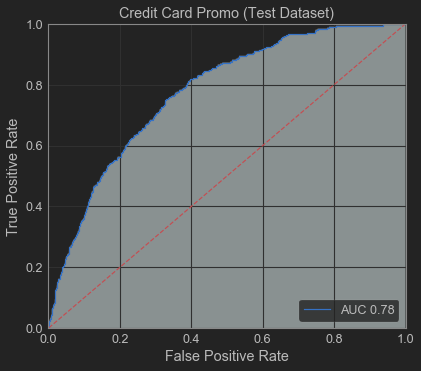

In [38]:
plt.title('Credit Card Promo (Test Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure',alpha=0.5)
plt.show()

In [39]:
roc_df = pd.DataFrame({'fpr': fpr1, 'tpr': tpr1, 'threshold':threshold1})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.321953
1,0.000197,0.000000,0.321953
2,0.000394,0.000000,0.315581
3,0.000394,0.006369,0.303902
4,0.000984,0.006369,0.302091
...,...,...,...
548,0.937389,0.993631,0.008833
549,0.937389,0.996815,0.008821
550,0.937980,0.996815,0.008810
551,0.937980,1.000000,0.008799


In [40]:
roc_df[roc_df['tpr'] >= 0.8].sort_values('fpr')

,fpr,tpr,threshold
437,0.387872,0.805732,0.051224
438,0.390628,0.805732,0.050921
439,0.390628,0.808917,0.050844
440,0.392203,0.808917,0.050691
441,0.392203,0.812102,0.050675
...,...,...,...
548,0.937389,0.993631,0.008833
549,0.937389,0.996815,0.008821
551,0.937980,1.000000,0.008799
550,0.937980,0.996815,0.008810


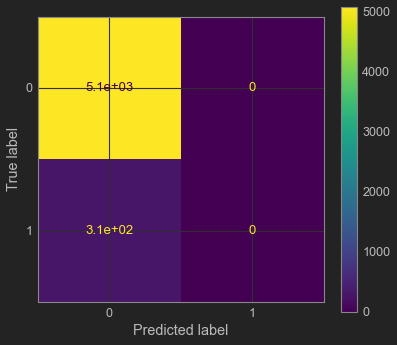

In [41]:
plot_confusion_matrix(log, X_test, y_test)

#
- SMOTTE and oversampling
- correlation ratio


## SMOTE

In [42]:
X_train

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
11964,2,4,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
5390,2,6,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
860,1,4,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [43]:
y_train

16511    0
7683     0
9189     0
13376    0
647      0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Offer_Accepted, Length: 12583, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)

In [46]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)
# X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

In [47]:
X_train_smote

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes
0,1,3,2,1104.250000,2056.000000,1013.000000,801.000000,547.000000,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
1,1,3,1,1277.000000,545.000000,1398.000000,1233.000000,1932.000000,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,4,1,277.500000,476.000000,34.000000,200.000000,400.000000,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,1,3,1,254.500000,160.000000,463.000000,95.000000,300.000000,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
4,2,3,3,1133.750000,1870.000000,1271.000000,678.000000,716.000000,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,1,3,1,741.581601,896.130447,673.494803,844.293506,552.407648,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23748,1,2,1,956.151003,283.474332,813.218449,1948.072186,779.839044,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
23749,1,4,1,1123.895936,916.591204,972.735127,1382.035146,1224.222267,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
23750,1,4,1,1270.952614,441.675089,1621.862813,1604.931406,1415.341150,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1


In [48]:
y_train_smote.value_counts()

1    11876
0    11876
Name: Offer_Accepted, dtype: int64

In [188]:
# smlogreg = LogisticRegression(solver='lbfgs')
smlogreg = LogisticRegression(class_weight='balanced',multi_class='multinomial')
smlogreg.fit(X_train_smote, y_train_smote)
smpred = smlogreg.predict(X_test)
smproba = smlogreg.predict_proba(X_test)

C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [191]:
print(classification_report(y_test, smpred))
print(confusion_matrix(y_test,smpred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5079
           1       0.12      0.20      0.15       314

    accuracy                           0.87      5393
   macro avg       0.54      0.55      0.54      5393
weighted avg       0.90      0.87      0.88      5393

[[4632  447]
 [ 252   62]]


In [50]:
print(classification_report(y_test, smpred))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5079
           1       0.12      0.20      0.15       314

    accuracy                           0.87      5393
   macro avg       0.54      0.55      0.54      5393
weighted avg       0.90      0.87      0.88      5393

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.49      5393
weighted avg       0.89      0.94      0.91      5393



C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [51]:
print(confusion_matrix(y_test,smpred))

[[4632  447]
 [ 252   62]]


# OVERSAMPLING

In [52]:
# df_copy = df.copy()
# new_int = []
# for i in df_copy['Offer Accepted']:
#     if i == 'No':
#         new_int.append(0)
#     else:
#         new_int.append(1)
# df_copy['Offer Accepted']=new_int
# df_copy.drop(['Customer Number'],axis=1,inplace=True)
# df_copy.dropna(axis=0,inplace=True)
# df_copy

In [53]:
X_train

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
11964,2,4,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
5390,2,6,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
860,1,4,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [54]:
y_train

16511    0
7683     0
9189     0
13376    0
647      0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Offer_Accepted, Length: 12583, dtype: int64

In [55]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes,Offer_Accepted
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
11964,2,4,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
5390,2,6,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
860,1,4,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [56]:
accept= df_train[df_train['Offer_Accepted']==1]
decline=df_train[df_train['Offer_Accepted']==0]

In [57]:
accept['Offer_Accepted'].value_counts().unique()

array([707], dtype=int64)

In [58]:
decline['Offer_Accepted'].value_counts().unique()

array([11876], dtype=int64)

In [59]:
from sklearn.utils import resample

accept_upsampled = resample(accept, #siapa yang mau di resample
                             replace=True,
                             n_samples=len(decline), #sebanyak apa samplingnya? sebanyak not_survived
                             random_state=42)

In [60]:
accept_upsampled

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes,Offer_Accepted
9148,2,3,1,652.00,773.0,595.0,663.0,577.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1
6539,1,4,1,997.50,678.0,797.0,1147.0,1368.0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1
10786,1,5,1,1141.00,367.0,908.0,2132.0,1157.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1
998,1,4,1,996.75,305.0,1241.0,1084.0,1357.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1
14116,1,4,1,1272.00,1462.0,1785.0,1013.0,828.0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
11378,1,3,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1
17817,1,3,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1
17174,1,4,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1


In [61]:
upsampleDF = pd.concat([decline,accept_upsampled])

In [62]:
upsampleDF

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes,Offer_Accepted
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
11378,1,3,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1
17817,1,3,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1
17174,1,4,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1


In [63]:
upsampleDF['Offer_Accepted'].value_counts()

1    11876
0    11876
Name: Offer_Accepted, dtype: int64

In [64]:
X_up=upsampleDF.drop('Offer_Accepted',axis=1)
y_up=upsampleDF['Offer_Accepted']
uplog = LogisticRegression()
uplog.fit(X_up,y_up)
uppred = uplog.predict(X_test)
upproba = uplog.predict_proba(X_test)

C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [65]:
upproba

array([[0.66868554, 0.33131446],
       [0.70797218, 0.29202782],
       [0.70614888, 0.29385112],
       ...,
       [0.78954947, 0.21045053],
       [0.86702735, 0.13297265],
       [0.64290466, 0.35709534]])

In [193]:
uplogx1 = LogisticRegression(penalty='none',class_weight='balanced',
                              max_iter=1000,solver='lbfgs',multi_class='multinomial',n_jobs=8)
uplogx1.fit(X_up,y_up)
uppredx1 = uplogx1.predict(X_test)
upprobax1 = uplogx1.predict_proba(X_test)
print(classification_report(y_test, uppredx1))
print(confusion_matrix(y_test,uppredx1))
# grid search - random forest

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.77      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.72      0.50      5393
weighted avg       0.93      0.67      0.75      5393

[[3349 1730]
 [  71  243]]


In [67]:
preprob_ovs = []
for i in upprobax1[:,0]:
    if i > 0.871527:
        preprob_ovs.append(0)
    else:
        preprob_ovs.append(1)
        
out = pd.DataFrame(confusion_matrix(y_test,preprob_ovs),columns=['pred_declined','pred_accepted'],
                  index=['act_declined','act_accepted'])
out

,pred_declined,pred_accepted
act_declined,415,4664
act_accepted,0,314


In [68]:
preprob_ov = []
for i in upproba[:,0]:
    if i > 0.8751:
        preprob_ov.append(0)
    else:
        preprob_ov.append(1)
        
out = pd.DataFrame(confusion_matrix(y_test,preprob_ov),columns=['pred_declined','pred_accepted'],
                  index=['act_declined','act_accepted'])
out

,pred_declined,pred_accepted
act_declined,392,4687
act_accepted,0,314


In [69]:
print(classification_report(y_test, uppred))
print(confusion_matrix(y_test,uppred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.76      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.71      0.50      5393
weighted avg       0.93      0.67      0.76      5393

[[3364 1715]
 [  75  239]]


In [70]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.00      0.00      0.00       314

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.49      5393
weighted avg       0.89      0.94      0.91      5393

[[5079    0]
 [ 314    0]]


C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Gradient Boost

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gradient = GradientBoostingClassifier(learning_rate = 0.1, subsample=0.5, n_estimators=500)

In [73]:
gradient.fit(X_up, y_up)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
print(classification_report(y_test, gradient.predict(X_test)))
confusion_matrix(y_test, gradient.predict(X_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5079
           1       0.14      0.43      0.21       314

    accuracy                           0.81      5393
   macro avg       0.55      0.63      0.55      5393
weighted avg       0.91      0.81      0.85      5393



array([[4233,  846],
       [ 178,  136]], dtype=int64)

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='auto', oob_score=True, random_state=42,min_samples_split=20,n_estimators=1000)

In [76]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [78]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[5075    4]
 [ 311    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.43      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg       0.69      0.50      0.49      5393
weighted avg       0.91      0.94      0.91      5393



## ADABOOST & Decision Tree

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=5, max_depth=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME')

In [81]:
# dt.fit(X_up, y_up)
ada.fit(X_up, y_up)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [82]:
adapred=ada.predict(X_test)

In [83]:
print(classification_report(y_test,adapred))
print(confusion_matrix(y_test,adapred))
print('\n\n')
print(classification_report(y_test, uppred))
print(confusion_matrix(y_test,uppred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.74      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.70      0.50      5393
weighted avg       0.93      0.67      0.76      5393

[[3367 1712]
 [  81  233]]



              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.76      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.71      0.50      5393
weighted avg       0.93      0.67      0.76      5393

[[3364 1715]
 [  75  239]]


In [84]:
ada.feature_importances_

array([0.        , 0.        , 0.33348045, 0.        , 0.02826684,
       0.03357047, 0.12410151, 0.        , 0.02042079, 0.13304084,
       0.        , 0.06232373, 0.08052991, 0.08987831, 0.09438713,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [85]:
feature_importance = pd.DataFrame(data=(X_up.columns,ada.feature_importances_)).T
feature_importance

,0,1
0,Bank_Accnt_Open,0
1,Household_Size,0
2,Credit_Rating,0.33348
3,Average_Balance,0
4,Q1_Balance,0.0282668
5,Q2_Balance,0.0335705
6,Q3_Balance,0.124102
7,Q4_Balance,0
8,Reward_Air Miles,0.0204208
9,Reward_Cash Back,0.133041


In [86]:
feature_importance.sort_values(by=1,ascending=False,inplace=True)

In [87]:
feature_importance

,0,1
2,Credit_Rating,0.33348
9,Reward_Cash Back,0.133041
6,Q3_Balance,0.124102
14,income_Low,0.0943871
13,income_High,0.0898783
12,mailer_Postcard,0.0805299
11,mailer_Letter,0.0623237
5,Q2_Balance,0.0335705
4,Q1_Balance,0.0282668
8,Reward_Air Miles,0.0204208


In [88]:
list_x = []
for i in feature_importance[0]:
    list_x.append(i)
    
list_x

['Credit_Rating',
 'Reward_Cash Back',
 'Q3_Balance',
 'income_Low',
 'income_High',
 'mailer_Postcard',
 'mailer_Letter',
 'Q2_Balance',
 'Q1_Balance',
 'Reward_Air Miles',
 'hold_home_3',
 'CC_1',
 'hold_home_2',
 'hold_home_1',
 'owningHome_No',
 'CC_4',
 'CC_3',
 'CC_2',
 'Bank_Accnt_Open',
 'overdraw_Yes',
 'overdraw_No',
 'income_Medium',
 'Household_Size',
 'Reward_Points',
 'Q4_Balance',
 'Average_Balance',
 'owningHome_Yes']

In [89]:
list_x = []
for i in feature_importance[feature_importance[1]>0][0]:
    list_x.append(i)
    
list_x.append('Offer_Accepted')
list_x

['Credit_Rating',
 'Reward_Cash Back',
 'Q3_Balance',
 'income_Low',
 'income_High',
 'mailer_Postcard',
 'mailer_Letter',
 'Q2_Balance',
 'Q1_Balance',
 'Reward_Air Miles',
 'Offer_Accepted']

In [90]:
new_DF = upsampleDF.copy()

In [91]:
new_DF

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes,Offer_Accepted
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
11378,1,3,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1
17817,1,3,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1
17174,1,4,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1


In [92]:
new_DF=new_DF[list_x]

In [93]:
new_DF.head()

,Credit_Rating,Reward_Cash Back,Q3_Balance,income_Low,income_High,mailer_Postcard,mailer_Letter,Q2_Balance,Q1_Balance,Reward_Air Miles,Offer_Accepted
16511,2,0,801.0,0,0,1,0,1013.0,2056.0,1,0
7683,1,0,1233.0,1,0,1,0,1398.0,545.0,1,0
9189,1,0,200.0,0,1,1,0,34.0,476.0,1,0
13376,1,0,95.0,0,0,1,0,463.0,160.0,0,0
647,3,0,678.0,0,0,1,0,1271.0,1870.0,1,0


In [94]:
upsampleDF

,Bank_Accnt_Open,Household_Size,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,owningHome_No,owningHome_Yes,Offer_Accepted
16511,1,3,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
7683,1,3,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
9189,1,4,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
13376,1,3,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
647,2,3,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
11378,1,3,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1
17817,1,3,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1
17174,1,4,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1


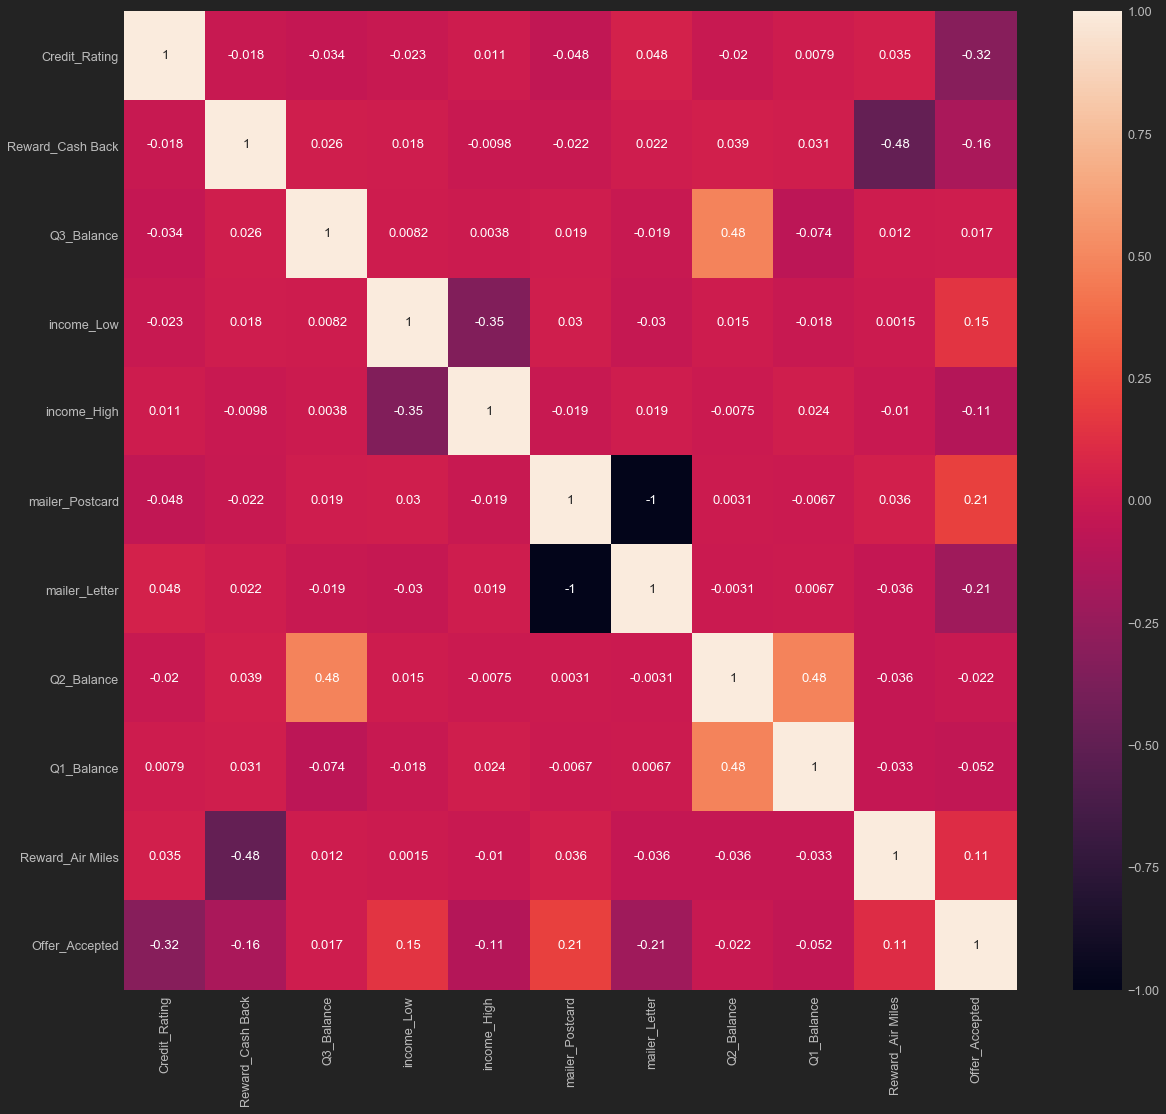

In [95]:
plt.figure(figsize=(20,18))
sns.heatmap(data=new_DF.corr(),annot=True)

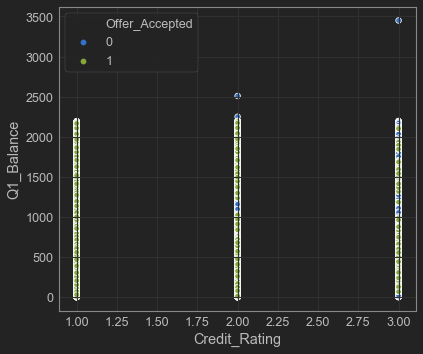

In [96]:
sns.scatterplot(data=new_DF,hue='Offer_Accepted',x='Credit_Rating',y='Q1_Balance')

- PCA
- Randomized Search

# PCA
- mentidakcorelasikan feature

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [98]:
upsampleDF.columns

Index(['Bank_Accnt_Open', 'Household_Size', 'Credit_Rating', 'Average_Balance',
       'Q1_Balance', 'Q2_Balance', 'Q3_Balance', 'Q4_Balance',
       'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'mailer_Letter', 'mailer_Postcard', 'income_High', 'income_Low',
       'income_Medium', 'overdraw_No', 'overdraw_Yes', 'CC_1', 'CC_2', 'CC_3',
       'CC_4', 'hold_home_1', 'hold_home_2', 'hold_home_3', 'owningHome_No',
       'owningHome_Yes', 'Offer_Accepted'],
      dtype='object')

In [99]:
Up_X = upsampleDF.drop('Offer_Accepted',axis=1)
Up_y = upsampleDF['Offer_Accepted']
print(Up_X)
print(Up_y)

       Bank_Accnt_Open  Household_Size  Credit_Rating  Average_Balance  \
16511                1               3              2          1104.25   
7683                 1               3              1          1277.00   
9189                 1               4              1           277.50   
13376                1               3              1           254.50   
647                  2               3              3          1133.75   
...                ...             ...            ...              ...   
7830                 1               4              3          1309.25   
11378                1               3              2           197.75   
17817                1               3              3           881.25   
17174                1               4              1           162.50   
6028                 1               4              2          1028.25   

       Q1_Balance  Q2_Balance  Q3_Balance  Q4_Balance  Reward_Air Miles  \
16511      2056.0      1013.0       

In [100]:
scaler = StandardScaler()
scaler.fit(Up_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
scaler_data=scaler.transform(Up_X)

In [102]:
scaler_data

array([[-0.54690098, -0.43890285,  0.27640141, ..., -0.10763051,
        -0.73263189,  0.73263189],
       [-0.54690098, -0.43890285, -0.96533988, ..., -0.10763051,
        -0.73263189,  0.73263189],
       [-0.54690098,  0.45847345, -0.96533988, ..., -0.10763051,
        -0.73263189,  0.73263189],
       ...,
       [-0.54690098, -0.43890285,  1.51814269, ..., -0.10763051,
        -0.73263189,  0.73263189],
       [-0.54690098,  0.45847345, -0.96533988, ...,  9.29104566,
         1.36494195, -1.36494195],
       [-0.54690098,  0.45847345,  0.27640141, ..., -0.10763051,
         1.36494195, -1.36494195]])

### PCA

In [103]:
pca = PCA(n_components=10)
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [104]:
pca_x=pca.transform(scaler_data)

In [105]:
pca_x

array([[ 0.77139073, -0.09923742,  0.81408682, ..., -1.61795215,
         1.2154862 ,  1.85987557],
       [ 1.77577193, -0.48941179, -1.91448395, ..., -0.27086459,
        -0.6100465 , -0.30681426],
       [-3.08333849, -0.11070602, -1.20201289, ..., -1.8591868 ,
        -0.07577441,  0.50882666],
       ...,
       [-0.23199589, -0.1549386 , -1.4722293 , ..., -1.73048838,
         0.12756981,  0.56421642],
       [-3.60362052, -0.63322937,  3.10256954, ...,  0.05338881,
         0.48786781,  0.33118149],
       [ 0.39210647, -2.19334945,  0.13888875, ...,  1.3746648 ,
        -2.17252544, -0.65065876]])

In [106]:
y_up=y_up.reset_index()
y_up=y_up['Offer_Accepted']
y_up

0        0
1        0
2        0
3        0
4        0
        ..
23747    1
23748    1
23749    1
23750    1
23751    1
Name: Offer_Accepted, Length: 23752, dtype: int64

In [107]:
pca_df = pd.DataFrame(pca_x,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
pca_df['target']= y_up
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,0.771391,-0.099237,0.814087,1.359563,-2.831058,0.085453,-1.300105,-1.617952,1.215486,1.859876,0
1,1.775772,-0.489412,-1.914484,-1.226153,-0.966506,0.058413,2.321521,-0.270865,-0.610046,-0.306814,0
2,-3.083338,-0.110706,-1.202013,-0.538214,-0.980306,-1.549495,-0.313350,-1.859187,-0.075774,0.508827,0
3,-3.109611,-0.183289,-0.672338,-1.112635,-1.346704,0.815259,-1.409420,0.346510,-1.291875,0.074317,0
4,0.645788,0.104906,-1.251475,-0.632550,-0.654386,0.200899,-1.765978,-1.506303,1.244052,1.873179,0
...,...,...,...,...,...,...,...,...,...,...,...
23747,1.896785,1.772950,-0.358058,-1.180813,0.394099,0.115333,2.689270,-0.237047,-0.208095,0.484664,1
23748,-3.813079,-1.524993,-1.084441,2.863361,1.794336,-1.603440,-1.386913,0.866229,-1.323962,0.093089,1
23749,-0.231996,-0.154939,-1.472229,-0.803377,-0.722526,-1.798233,0.390892,-1.730488,0.127570,0.564216,1
23750,-3.603621,-0.633229,3.102570,0.329783,-0.428358,0.648198,3.080824,0.053389,0.487868,0.331181,1


In [108]:
sum(pca.explained_variance_)

18.65109296890065

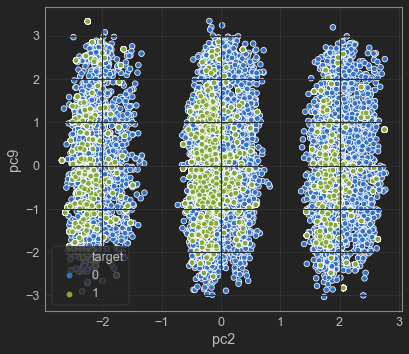

In [109]:
sns.scatterplot(data=pca_df,x='pc2',y='pc9',hue='target')

In [110]:
adapce=AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME.R')
adapce.fit(pca_df.drop('target', axis=1), pca_df['target'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

### Scalling X_test

In [111]:
scaled_Xtest = scaler.transform(X_test)
Xtest_pca = pca.transform(scaled_Xtest)
Xtest_pca

array([[ 1.52145418, -0.24794732,  1.12814013, ..., -1.22094205,
         1.14542578, -1.95140349],
       [ 0.8399644 , -0.17731579, -1.0857618 , ...,  0.15567077,
         1.03602061, -0.88040189],
       [-0.57498716, -0.05055724,  1.96728678, ...,  0.05415844,
        -0.98802738,  0.45678679],
       ...,
       [ 0.4947556 ,  2.06176276,  0.62267867, ...,  0.61319274,
         2.15399249,  0.82708803],
       [ 1.02745416,  1.92372512,  0.23104713, ...,  2.28521938,
         2.56518203,  0.93001644],
       [-2.99343893, -0.06114061, -0.83130095, ...,  1.2458115 ,
        -0.88882544, -0.10821153]])

In [112]:
adapce_pred=adapce.predict(Xtest_pca)

In [113]:
print(confusion_matrix(y_test,adapce_pred))
print(classification_report(y_test,adapce_pred))

[[3471 1608]
 [ 138  176]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      5079
           1       0.10      0.56      0.17       314

    accuracy                           0.68      5393
   macro avg       0.53      0.62      0.48      5393
weighted avg       0.91      0.68      0.76      5393



# Randomized Search (Cross Validation)

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
random_grid = {
    # n_estimators = jumlah decision trees
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    # Number of features
    'max_features': ['auto', 'sqrt'],
    # kedalaman pohon
    'max_depth': [int(x) for x in np.linspace(start=10,stop=110,num=11)],
    # minimum sample untuk di-split
    'min_samples_split': [int(x) for x in np.linspace(start=100, stop=1000, num=100)],
    # bootstrap
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= random_grid,
                              n_iter=10, cv=3, n_jobs=-1, scoring='accuracy')
rf_random.fit(X_up, y_up)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=20,
                                                    min_weight_fraction_leaf=0.0,
           

In [116]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 327,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [117]:
rfc_rand = rf_random.best_estimator_

In [118]:
rand_pred = rfc_rand.predict(X_test)
rand_proba = rfc_rand.predict_proba(X_test)

In [120]:
print(classification_report(y_test, rand_pred))
print(confusion_matrix(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      5079
           1       0.13      0.56      0.21       314

    accuracy                           0.75      5393
   macro avg       0.55      0.66      0.53      5393
weighted avg       0.92      0.75      0.82      5393

[[3881 1198]
 [ 138  176]]


# DecisionTreeClassifier / Classification Trees

In [121]:
tree = DecisionTreeClassifier(min_samples_split=2000,min_samples_leaf=1001,random_state=1000)
tree.fit(X_up,y_up)
treePred = tree.predict(X_test)

In [122]:
print(classification_report(y_test,treePred))
print(confusion_matrix(y_test,treePred))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      5079
           1       0.11      0.75      0.19       314

    accuracy                           0.62      5393
   macro avg       0.54      0.68      0.47      5393
weighted avg       0.93      0.62      0.72      5393

[[3098 1981]
 [  77  237]]


# Naive Bayes Classifier

In [ ]:
nbc = GaussianNB()
nbc.fit(X_up,y_up)
nbcpred=nbc.predict(X_test)

In [ ]:
print(classification_report(y_test,nbcpred))
print(confusion_matrix(y_test,nbcpred))

# SVC and NuSVC

In [ ]:
from sklearn.svm import SVC,LinearSVC,NuSVC

In [ ]:
clf = SVC()
clf.fit(X_up,y_up)

In [ ]:
clf.predict(X_test)

In [ ]:
# get support vectors
clf.support_vectors_

In [ ]:
# get indices of support vectors
clf.support_

In [ ]:
# get number of support vectors for each class
clf.n_support_

In [ ]:
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

In [ ]:
clg = SVC(probability=True,cache_size=600, shrinking=False,decision_function_shape='ovo')
clg.fit(X_up,y_up)
clg_p=clg.predict(X_test)

In [ ]:
print(classification_report(y_test,clg_p))
print(confusion_matrix(y_test,clg_p))

In [ ]:
# lin_clf = LinearSVC(random_state=0,multi_class='crammer_singer',class_weight="balanced",max_iter=10000,tol=1e-5)
# lin_clf.fit(X_up,y_up)

In [ ]:
# print(lin_clf.coef_)
# print(lin_clf.intercept_)
# print(lin_clf.predict(X_test))

In [ ]:
# lin_clf_p = lin_clf.predict(X_test)

In [ ]:
# print(classification_report(y_test,lin_clf_p))
# print(confusion_matrix(y_test,lin_clf_p))

# Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto', oob_score=True, random_state=42)
rfc

In [ ]:
# param_grid = {
#     'bootstrap': [True, False],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [100,200],
#     'min_samples_split': [2,5,10],
#     'n_estimators': [200,300],
#     'min_samples_leaf' : [2,3,4,5],
#     'class_weight': ['dict','list of dict','balanced']
# }
# # param_grid = {uplogx1}
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
# grid_search.fit(X_up, y_up)

In [ ]:
# grid_search.best_params_

In [ ]:
# rfc_grid = grid_search.best_estimator_

In [ ]:
# grid_pred = rfc_grid.predict(X_test)
# grid_proba = rfc_grid.predict_proba(X_test)

In [ ]:
# print(classification_report(y_test, grid_pred))
# print(confusion_matrix(y_test, grid_pred))

# Data Feature_Importance

In [123]:
new_DF

,Credit_Rating,Reward_Cash Back,Q3_Balance,income_Low,income_High,mailer_Postcard,mailer_Letter,Q2_Balance,Q1_Balance,Reward_Air Miles,Offer_Accepted
16511,2,0,801.0,0,0,1,0,1013.0,2056.0,1,0
7683,1,0,1233.0,1,0,1,0,1398.0,545.0,1,0
9189,1,0,200.0,0,1,1,0,34.0,476.0,1,0
13376,1,0,95.0,0,0,1,0,463.0,160.0,0,0
647,3,0,678.0,0,0,1,0,1271.0,1870.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7830,3,0,1506.0,1,0,0,1,1731.0,749.0,1,1
11378,2,0,195.0,0,1,1,0,199.0,325.0,0,1
17817,3,0,808.0,1,0,1,0,871.0,878.0,1,1
17174,1,0,290.0,1,0,0,1,121.0,33.0,1,1


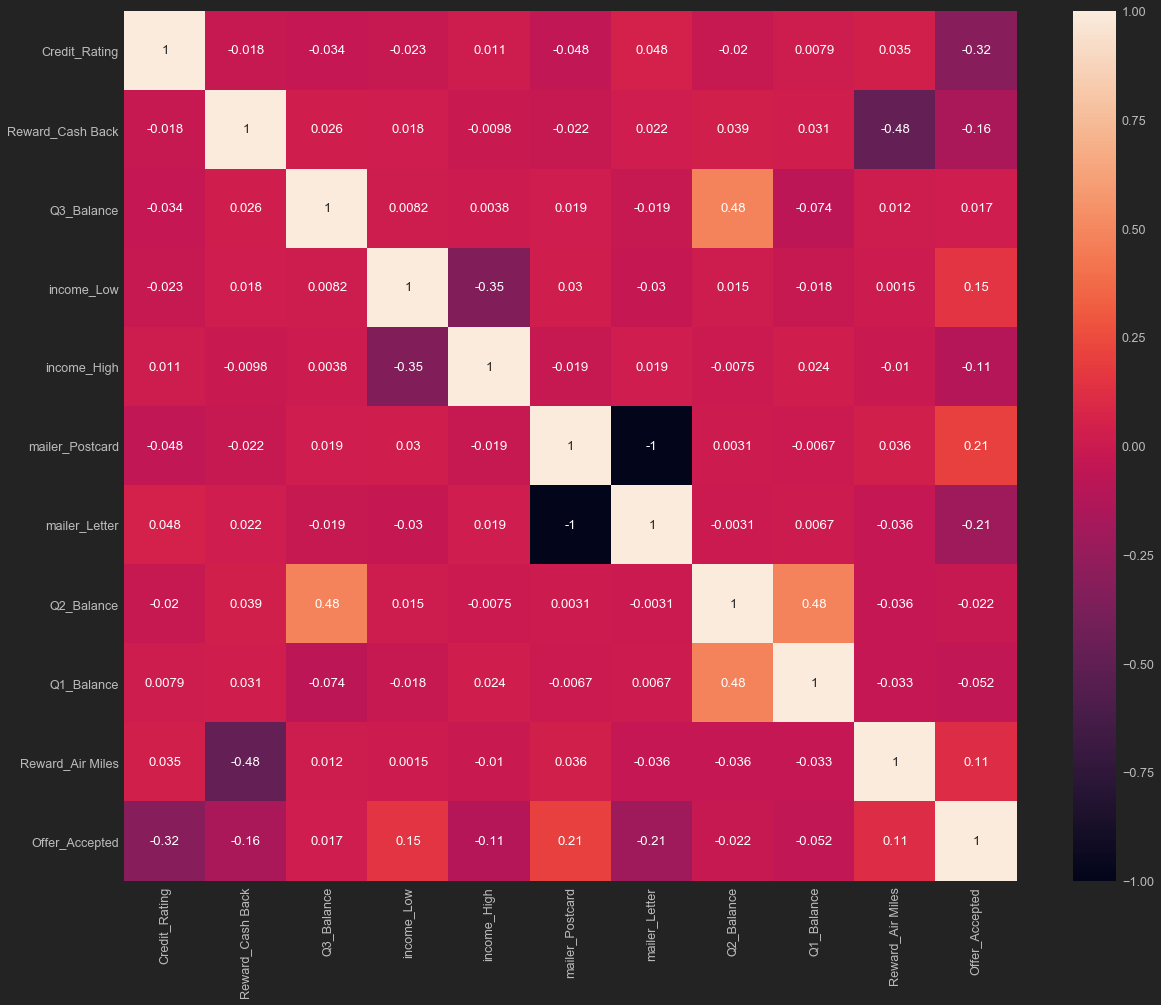

In [127]:
plt.figure(figsize=(20,16))
sns.heatmap(data=new_DF.corr(),annot=True)

In [200]:
XL_og = new_DF.drop('Offer_Accepted',axis=1)
yL_og = new_DF['Offer_Accepted']
XL_train, XL_test, yL_train, yL_test = train_test_split(XL_og, yL_og, test_size=0.2, random_state=50)
lgrs.fit(XL_train,yL_train)
newpred = lgrs.predict(XL_test)
newprob = lgrs.predict_proba(XL_test)
print(classification_report(yL_test, newpred))
print(confusion_matrix(yL_test, newpred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2359
           1       0.67      0.74      0.71      2392

    accuracy                           0.69      4751
   macro avg       0.69      0.69      0.69      4751
weighted avg       0.69      0.69      0.69      4751

[[1486  873]
 [ 612 1780]]


C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [199]:
print(classification_report(yL_test, newpred))
print(confusion_matrix(yL_test, newpred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      3508
           1       0.68      0.75      0.71      3618

    accuracy                           0.69      7126
   macro avg       0.69      0.69      0.69      7126
weighted avg       0.69      0.69      0.69      7126

[[2225 1283]
 [ 912 2706]]


In [196]:
print(classification_report(y_test, uppredx1))
print(confusion_matrix(y_test,uppredx1))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      5079
           1       0.12      0.77      0.21       314

    accuracy                           0.67      5393
   macro avg       0.55      0.72      0.50      5393
weighted avg       0.93      0.67      0.75      5393

[[3349 1730]
 [  71  243]]
